In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import re
from tqdm import tqdm,trange
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('C:\\Users\\ASUS\\PycharmProjects\\RahnemaProject')

In [3]:
df = pd.read_csv('processed_df.csv')

In [5]:
df.head()

,user_coded,ip_encoded,status_code,response_length,response_time,Head,Options,Post,Put,geo_coded,Le_coded_path,le_last_page,date_time,date_time.1
0,107,11019,304,0,32.0,0,0,0,0,110,4,62537.0,1.620780e+12,1.620780e+12
1,105,10925,200,0,24.0,1,0,0,0,110,0,62537.0,1.620780e+12,1.620780e+12
2,107,11019,304,0,16.0,0,0,0,0,110,8,4.0,1.620780e+12,1.620780e+12
3,105,38695,200,0,20.0,1,0,0,0,110,0,62537.0,1.620780e+12,1.620780e+12
4,107,11019,304,0,32.0,0,0,0,0,110,8,8.0,1.620780e+12,1.620780e+12


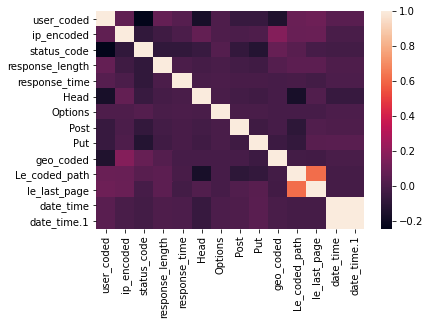

In [7]:
sns.heatmap(df.corr())

PCA
---

In [4]:
from sklearn.preprocessing import  StandardScaler
scalar = StandardScaler()
scalar.fit(df)
scaled = scalar.transform(df)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  #to be able to visualize it
pca.fit(scaled)
DFpca = pca.transform(scaled)

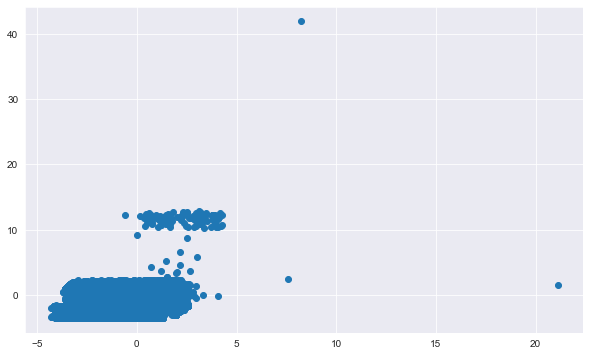

In [6]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.scatter(DFpca[:,0],DFpca[:,1])

In [13]:
pca.components_

array([[ 8.48420148e-02, -7.75232310e-03, -6.34201887e-02,
         2.33538669e-02,  2.09587469e-02, -9.02077766e-02,
         9.66693309e-03,  1.70384828e-02,  6.53773251e-02,
        -2.51892303e-02, -2.69447353e-02, -3.00633088e-02,
         6.97379103e-01,  6.97379103e-01],
       [ 2.94274161e-01,  1.58212192e-01, -8.08596704e-02,
         1.38345901e-01,  4.19496633e-04, -1.72979787e-01,
        -1.76912989e-02, -7.80479778e-02, -3.49239108e-02,
        -5.87938844e-02,  6.55498542e-01,  6.26043484e-01,
        -6.39966828e-03, -6.39966828e-03]])

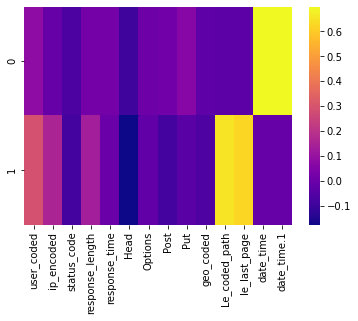

In [14]:
df_comp = pd.DataFrame(pca.components_,columns=df.columns)
sns.heatmap(df_comp,cmap='plasma')


In [16]:
print(pca.explained_variance_ratio_)

[0.14443318 0.12315078]


Clustering
---

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled)

KMeans(n_clusters=2)

In [6]:
kmeans.cluster_centers_, kmeans.labels_

(array([[-0.04616164,  0.06139421,  0.01212622, -0.01662432, -0.01434099,
          0.10468768, -0.0104278 , -0.03763416, -0.05199492, -0.02742292,
          0.32501919,  0.30082003, -1.40768805, -1.40768805],
        [-0.19128453, -0.21968177, -0.00343571, -0.09481141,  0.02063561,
          0.0963191 ,  0.02190123,  0.12490879,  0.09731778,  0.05769242,
         -1.16777425, -0.99698312,  0.23123663,  0.23123663],
        [ 0.16556014,  0.12804439, -0.00405769,  0.07866558, -0.00737431,
         -0.12756842, -0.0104278 , -0.07132519, -0.04326431, -0.02749401,
          0.68137832,  0.56905895,  0.59415355,  0.59415355]]),
 array([0, 0, 0, ..., 2, 2, 1]))

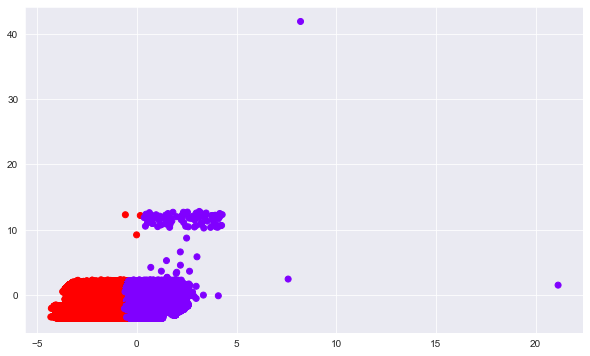

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.scatter(DFpca[:,0],DFpca[:,1],c=kmeans.labels_,cmap='rainbow')


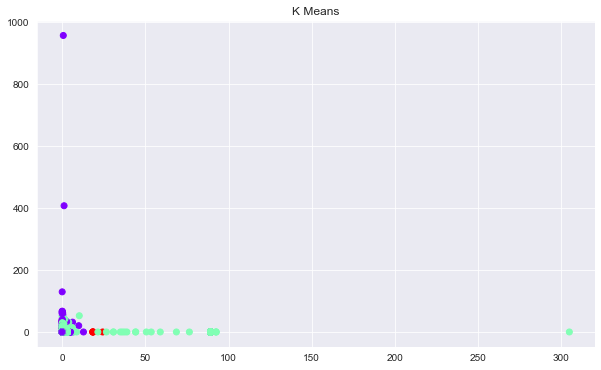

In [14]:
f, ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(scaled[:,3],scaled[:,4],c=kmeans.labels_,cmap='rainbow')


In [20]:
df.head()

,user_coded,ip_encoded,status_code,response_length,response_time,Head,Options,Post,Put,geo_coded,Le_coded_path,le_last_page,date_time,date_time.1
0,107,11019,304,0,32.0,0,0,0,0,110,4,62537.0,1.620780e+12,1.620780e+12
1,105,10925,200,0,24.0,1,0,0,0,110,0,62537.0,1.620780e+12,1.620780e+12
2,107,11019,304,0,16.0,0,0,0,0,110,8,4.0,1.620780e+12,1.620780e+12
3,105,38695,200,0,20.0,1,0,0,0,110,0,62537.0,1.620780e+12,1.620780e+12
4,107,11019,304,0,32.0,0,0,0,0,110,8,8.0,1.620780e+12,1.620780e+12


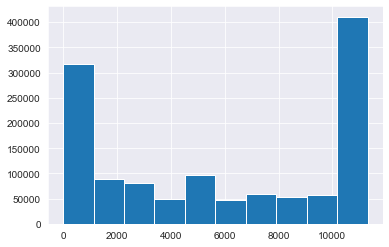

In [18]:
df['user_coded'].hist()

In [ ]:
sns.pairplot(df)

Isolation Forest
---


In [7]:
from sklearn.ensemble import IsolationForest
Iforest= IsolationForest(n_estimators=10,contamination=0.04)

In [8]:
Iforest.fit(df)

IsolationForest(contamination=0.04, n_estimators=10)

In [11]:
Iforest.predict(np.reshape(df.loc[251743].values,(1,-1)))

array([-1])

Anomalize
---

In [11]:
#time series


Elliptic Envelope
---


In [ ]:
from sklearn.covariance import EllipticEnvelope
model = EllipticEnvelope(contamination = 0.04)
model.fit(scaled)

In [10]:
model.predict(np.reshape(scaled[251743,:],(1,-1)))


array([-1])

DBSCAN
---


In [17]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.04, min_samples = 10).fit(df)

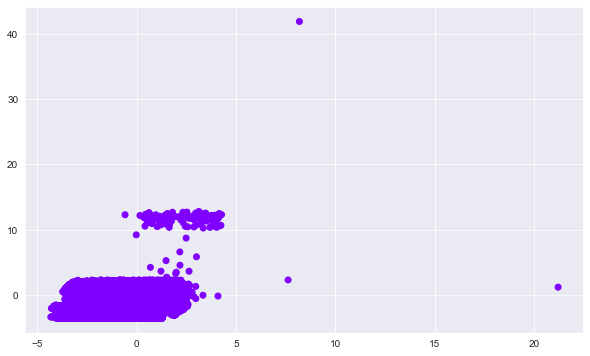

In [18]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.scatter(DFpca[:,0],DFpca[:,1],c=dbscan.labels_,cmap='rainbow')


In [19]:
outliers = df[dbscan.labels_ == -1]

In [20]:
out = pd.concat([df,pd.DataFrame(dbscan.labels_)],axis=1)

In [ ]:
out.head()